In [7]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
# Importing the dataset
data = pd.read_csv('h_train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
# for remember mmixed typee data always object
data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [5]:
# for numeric feature
numeric_feature = [feature for feature in data.columns if data[feature].dtypes!='O']
year_feature = [feature for feature in numeric_feature if 'Yr' in feature or 'Year' in feature]
discrete_feature = [feature for feature in numeric_feature if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
continuous_feature = [feature for feature in numeric_feature if  feature not in discrete_feature +year_feature+['Id']]
categorical_feature = [feature for feature in data.columns if data[feature].dtypes=='O']

print("The length of numeric feature are:",len(numeric_feature))
print("The length of date-time feature are:",len(year_feature))
print("The length of discrete feature are:",len(discrete_feature))
print("The length of continuous feature are:{}".format(len(continuous_feature)))
print("The length of categorical feature are:",len(categorical_feature))

The length of numeric feature are: 38
The length of date-time feature are: 4
The length of discrete feature are: 17
The length of continuous feature are:16
The length of categorical feature are: 43


### nw lets see missing data

In [6]:
feature_with_na = [feature for feature in data.columns if data[feature].isnull().sum()>1]
for feature in feature_with_na:
    print(feature,np.round(data[feature].isnull().mean(),4),'% missing values')
   

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


Here we see that Alley,FirePlaceQu,poolqc,Fence,MiscFeature have lots number of missing values 

Here we have separetly train and test data bcz this is kaggle problem so we use whole data for festurer enginnering and we do same feature enginnering for test data

but in real life project we dont have test data separetly so before feature engineering we split the data into train and test data and then separetly separetly do feature enginnering on train and test data .

here for example we see hw to split the data but remember u have test data for this separetly 

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('SalePrice',axis=1),data['SalePrice'],test_size=0.1,random_state=0)

In [8]:
X_train.shape

(1314, 80)

### Lets Start feature engineering :-


In [9]:
# For Numeric variable
# First we see fill missing value for discreate feature
# lets see hw many discreate deature are in our dataset 
# From EDA we know that there is no missing value in discreate feature 
# So nw we move to continuous feature and see what we do 


In [10]:
feature_with_na_numeric = [feature for feature in numeric_feature if data[feature].isnull().sum()>1]
for feature in feature_with_na_numeric:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
MasVnrArea 0.0055  % missing values
GarageYrBlt 0.0555  % missing values


In [11]:
feature_with_na_date = [feature for feature in year_feature if data[feature].isnull().sum()>1]
for feature in feature_with_na_date:
    print(feature, np.round(data[feature].isnull().mean(), 4),  '% missing values')

GarageYrBlt 0.0555 % missing values


In [12]:
feature_with_na_numeric_continuous = [feature for feature in continuous_feature if data[feature].isnull().sum()>1]
for feature in feature_with_na_numeric_continuous:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
MasVnrArea 0.0055  % missing values


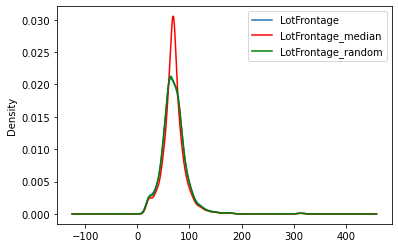

In [13]:
# There is two feature in continuous have missing values and one in datetime  
# LotFrontage have more missing value and MasVnrArea and GarageYrblt has less
# For ManVnrAra and GarageYrBlt we use median method to fill missing value
# bcz there is outliers and bcz its missing value is less than 5 percent
# and skewed distribution
# For LotFrontage we check for median and Randomsample
# Lets Check
df = data.copy()
median = df.LotFrontage.median()
def impute_nan2(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]= df[variable]
    
    #It will have the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample    
    
impute_nan2(df,'LotFrontage',median)

fig = plt.figure()
ax = fig.add_subplot(111)
df['LotFrontage'].plot(kind='kde', ax=ax)
df.LotFrontage_median.plot(kind='kde', ax=ax, color='red')
df.LotFrontage_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

we see that clearly that when we do median imputation distribution of our graph get effected and when we do Random Sample Imputation our distribution is not affected

so from here we know that for Lot frontage we do Random sample imputation.

So here we clear we use median imputation for masVnrArea and LotFrontage and random sample imputation for LotFrontage 

In [14]:
np.round(data['LotFrontage'].isnull().mean(),4)

0.1774

In [15]:
## Lets start 
## Replacing the numerical Missing Values
dataset = data.copy()
for feature in feature_with_na_numeric:
    
    if np.round(dataset[feature].isnull().mean(),4)<=0.0500 :
        ## We will replace by using median since there are outliers
        median_value=dataset[feature].median()
        ## create a new feature to capture nan values
        dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
        dataset[feature].fillna(median_value,inplace=True)
    else:
        dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
        random_sample = dataset[feature].dropna().sample(dataset[feature].isnull().sum(),random_state=0)
        ##pandas need to have same index in order to merge the dataset
        random_sample.index = dataset[dataset[feature].isnull()].index
        dataset.loc[dataset[feature].isnull(),feature]=random_sample
        
          

In [16]:
dataset[feature_with_na_numeric].isnull().sum() 

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [17]:
dataset.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,50.0,9765,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,1993,1993,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Ex,Gd,PConc,Gd,Gd,No,ALQ,310,Unf,0,370,680,GasA,Gd,Y,SBrkr,680,790,0,1470,0,0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,1993.0,Fin,2,420,TA,TA,Y,232,63,0,0,0,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000,1,0,0
96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,183.0,Gd,TA,PConc,Gd,TA,Av,ALQ,1162,Unf,0,426,1588,GasA,Ex,Y,SBrkr,1588,0,0,1588,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,1999.0,RFn,2,472,TA,TA,Y,158,29,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000,0,0,0
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,BrkFace,48.0,TA,TA,CBlock,TA,TA,No,Rec,520,Unf,0,440,960,GasA,TA,Y,FuseF,960,0,0,960,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,432,TA,TA,P,120,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750,0,0,0
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5

In [18]:
# Nw do something for date time feature
# we see in EDA YrSold not give any important information
# so we use that make that all 3 date feature calculate the age of that
# Lets do 
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [19]:
for feature in year_feature:
    if feature!='YrSold':
        dataset[feature]=dataset['YrSold']-dataset[feature]
        

In [20]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0,0,0


In [21]:
dataset[year_feature]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008
...,...,...,...,...
1455,8,7,8.0,2007
1456,32,22,32.0,2010
1457,69,4,69.0,2010
1458,60,14,60.0,2010


### Since the numerical variable are skewed we will perform log normal distribution


In [22]:
for feature in continuous_feature:
    if 0 in dataset[feature].unique(): # here we use that we skip that which has 0 
        pass #bcz some of transformation give not good result with zero
    else:
        dataset[feature]=np.log(dataset[feature])

In [23]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216,0,0,0


Before go to categorical feature we have to fix outliers. Lets see hw we fix the outliers, befofre fixing the outliers we have also think that which algorithm you are going to use bcz in all algorithm u dont need to remove the outliers.

but for practice and its good to remove the outliers

After logarithmetic transformation we see all data aare normally distributed so we apply  that technique


In [24]:
for feature in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']:
    upper_boundary=dataset[feature].mean() + 3* dataset[feature].std()
    lower_boundary=dataset[feature].mean() - 3* dataset[feature].std()
    dataset.loc[dataset[feature]>=upper_boundary,feature]=upper_boundary
    dataset.loc[dataset[feature]>=lower_boundary,feature]=lower_boundary
        

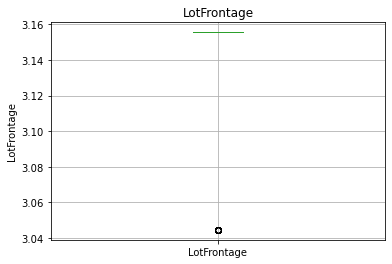

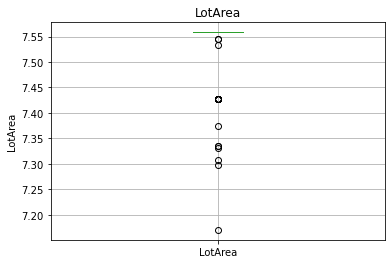

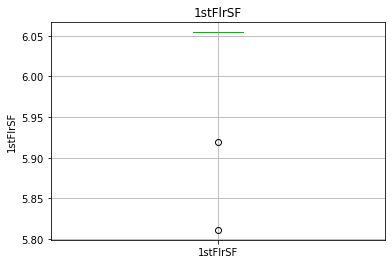

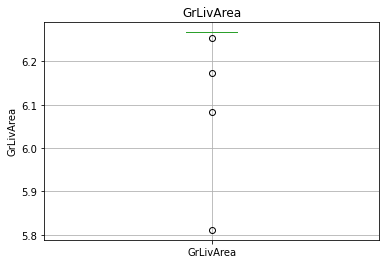

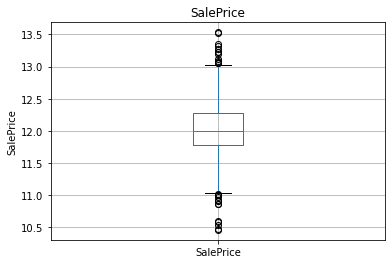

In [25]:
for feature in continuous_feature:
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset.boxplot(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [30]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.153635,7.556349,6.099315,5.575342,36.547945,22.950000,103.117123,443.639726,46.549315,567.240411,1057.429452,6.054052,346.992466,5.844521,6.266611,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,29.290411,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051,0.177397,0.005479,0.055479
std,421.610009,42.300571,0.014697,0.020877,1.382997,1.112799,30.250152,20.640653,180.731373,456.098091,161.319273,441.866955,438.705324,0.007282,436.528436,48.623081,0.013106,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.630078,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452,0.382135,0.073846,0.228992
min,1.000000,20.000000,3.044522,7.170120,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.811141,0.000000,0.000000,5.811141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242,0.000000,0.000000,0.000000
25%,365.750000,20.000000,3.155613,7.558494,5.000000,5.000000,8.000000,4.000000,0.000000,0.000000,0.000000,223.000000,795.750000,6.054311,0.000000,0.000000,6.267123,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,6.750000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097,0.000000,0.000000,0.000000
50%,730.500000,50.000000,3.155613,7.558494,6.000000,5.000000,35.000000,14.000000,0.000000,383.500000,0.000000,477.500000,991.500000,6.054311,0.000000,0.000000,6.267123,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,28.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505,0.000000,0.000000,0.000000
75%,1095.250000,70.000000,3.155613,7.558494,7.000000,6.000000,54.000000,41.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,6.054311,728.000000,0.000000,6.267123,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,47.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731,0.000000,0.000000,0.000000
max,1460.000000,190.000000,3.155613,7.558494,10.000000,9.000000,136.000000,60.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,6.054311,2065.000000,572.000000,6.267123,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,107.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534473,1.000000,1.000000,1.000000


## Nw we see Categrical feature

In [31]:
## First we Missing value in categorical feature
categorical_feature = [feature for feature in data.columns if data[feature].dtypes=='O']
len(categorical_feature)

43

In [32]:
# Finding the missing value of categorical feature
feature_with_na_categorical = [feature for feature in categorical_feature if data[feature].isnull().sum()>1]
for feature in feature_with_na_categorical:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')

Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


Here Alley,Fireplace,poolqc,fence,miscfeature have lots of missing value lets se wht we do in feature engineering

In [33]:
## Lets start 
## Replacing the categorical Missing Values

for feature in feature_with_na_categorical:
    
    if np.round(dataset[feature].isnull().mean(),4)<=0.0555 :
        ## We will replace by using frequent category imputation bcz less number of missing value
        dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
        most_frequent_category = dataset[feature].value_counts().index[0]
        dataset[feature].fillna(most_frequent_category,inplace=True)
    else:
        dataset[feature]= np.where(dataset[feature].isnull(),"Missing",dataset[feature])

In [35]:
dataset.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan
0,1,60,RL,3.155613,7.558494,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.054311,854,0,6.267123,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,3.155613,7.558494,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,6.054311,0,0,6.267123,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,3.155613,7.558494,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.054311,866,0,6.267123,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,3.155613,7.558494,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.054311,756,0,6.267123,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,3.155613,7.558494,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,6.054311,1053,0,6.267123,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,3.155613,7.558494,Pave,Missing,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Ex,Gd,PConc,Gd,Gd,No,ALQ,310,Unf,0,370,680,GasA,Gd,Y,SBrkr,6.054311,790,0,6.267123,0,0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,16.0,Fin,2,420,TA,TA,Y,232,63,0,0,0,0,Missing,Missing,Shed,480,4,2009,WD,Normal,12.128111,1,0,0,0,0,0,0,0,0,0,0,0,0
96,97,20,RL,3.155613,7.558494,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,7,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,183.0,Gd,TA,PConc,Gd,TA,Av,ALQ,1162,Unf,0,426,1588,GasA,Ex,Y,SBrkr,6.054311,0,0,6.267123,0,0,2,0,3,1,Gd,6,Typ,0,Missing,Attchd,7.0,RFn,2,472,TA,TA

In [38]:
dataset.isnull().mean()

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage        0.0
LotArea            0.0
                  ... 
BsmtFinType2nan    0.0
GarageTypenan      0.0
GarageFinishnan    0.0
GarageQualnan      0.0
GarageCondnan      0.0
Length: 94, dtype: float64

all our null value go from both categorical and numerical 

Nw focus on Rare categorical value we see in EDA there is lots of Rare categorical 

lets check :

we will remove categorical variable that are present less than 1% of the observation

In [39]:
# Removing and adding new label to rare variable
# SImply here we remove that line use this 
for feature in categorical_feature:
    temp= dataset[feature].value_counts(normalize=True, ascending=True)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [42]:
dataset.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan
0,1,60,RL,3.155613,7.558494,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.054311,854,0,6.267123,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,3.155613,7.558494,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,6.054311,0,0,6.267123,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,3.155613,7.558494,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.054311,866,0,6.267123,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,3.155613,7.558494,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.054311,756,0,6.267123,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,3.155613,7.558494,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,6.054311,1053,0,6.267123,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,50,RL,3.155613,7.558494,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Rare_var,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.054311,566,0,6.267123,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870600,0,0,0,0,0,0,0,0,0,0,0,0,0
6,7,20,RL,3.155613,7.558494,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,6.054311,0,0,6.267123,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634603,0,0,0,0,0,0,0,0,0,0,0,0,0
7,8,60,RL,3.155613,7.558494,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,6.054311,983,0,6.267123,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,2

In [43]:
# Lets check how many category left
for feature in categorical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 23
The feature is Condition1 and number of categories are 6
The feature is Condition2 and number of categories are 2
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 6
The feature is RoofStyle and number of categories are 3
The feature is RoofMatl and number of categories are 2
The feature is Exterior1st and number of categories are 11
The feature is Exterior2nd and number of categories are 11
The feature is MasVnrType and number of cate

lots improvement nw we see wht we do with rest



Nw we do categorical encoding change category into the number 

if we have nominal category we go with onehot encoding

if we have ordinal category we go with label encoding


In [47]:
#for feature in categorical_feature:
    #labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    #labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    #dataset[feature]=dataset[feature].map(labels_ordered)

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

for feature in categorical_feature:
    # Encode labels in column 'species'.
    dataset[feature]= label_encoder.fit_transform(dataset[feature])

In [48]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan
0,1,60,3,3.155613,7.558494,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,2,2,0,5,706,3,0,150,856,2,4,1,3,6.054311,854,0,6.267123,1,0,2,1,3,1,2,8,4,0,1,3,5.0,1,2,548,1,2,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,20,3,3.155613,7.558494,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,2,2,3,4,978,3,0,284,1262,2,4,1,3,6.054311,0,0,6.267123,0,1,2,0,3,1,1,6,4,1,3,3,31.0,1,2,460,1,2,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,60,3,3.155613,7.558494,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,2,2,1,5,486,3,0,434,920,2,4,1,3,6.054311,866,0,6.267123,1,0,2,1,3,1,2,6,4,1,3,3,7.0,1,2,608,1,2,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,70,3,3.155613,7.558494,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,1,3,0,4,216,3,0,540,756,2,3,1,3,6.054311,756,0,6.267123,1,0,1,0,3,1,2,7,4,1,4,1,8.0,0,3,642,1,2,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,60,3,3.155613,7.558494,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,2,2,2,5,655,3,0,490,1145,2,4,1,3,6.054311,1053,0,6.267123,1,0,2,1,4,1,2,9,4,1,3,3,8.0,1,3,836,1,2,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0,0,0,0,0,0,0,0,0,0,0


Nw we do scaling  for that we have to remove id and saleprice 

we use robustscaler 



In [49]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

93

In [52]:
# Feature Scaling
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit(dataset[feature_scale])


RobustScaler()

In [53]:
scaler.transform(dataset[feature_scale])

array([[ 0.2,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [-0.6,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0.2,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0.4,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [-0.6,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [-0.6,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [54]:
# transform the train and test set, and add on the Id and SalePrice variables
df = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [55]:
df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan
0,1,12.247694,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500,0.0,0.0,0.0,1.0,0.5,0.0,-0.652174,-0.243243,0.0,0.0,0.500000,0.428571,1.0,1.193303,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.452790,0.0,0.0,-0.559829,-0.269652,0.0,0.0,0.0,0.0,0.0,1.173077,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.0,-0.333333,0.0,-0.571429,0.0,0.0,0.281573,0.0,0.0,0.0,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,-0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.125,-1.0,0.0,0.0,0.0,0.0,3.0,-0.086957,0.459459,0.0,0.0,-0.500000,-0.571429,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.0,0.5,0.834679,0.0,0.0,-0.330769,0.538308,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.074534,0.0,0.0,-0.082816,0.0,0.0,0.0,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.500,0.0,0.0,0.0,1.0,0.5,0.0,-0.608696,-0.216216,0.0,0.0,0.500000,0.428571,1.0,0.986301,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.143910,0.0,0.0,-0.074359,-0.142289,0.0,0.0,0.0,0.0,0.0,1.189560,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,-0.521739,0.0,0.0,0.530021,0.0,0.0,0.0,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.750,0.0,0.0,0.0,1.0,0.5,0.0,1.217391,0.594595,0.0,0.0,-0.833333,-0.428571,0.0,0.000000,0.0,0.0,-0.5,-1.0,1.0,0.0,0.5,-0.235170,0.0,0.0,0.106838,-0.468657,0.0,-0.5,0.0,0.0,0.0,1.038462,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.666667,-1.0,-0.496894,-1.0,1.0,0.670807,0.0,0.0,0.0,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.500,0.0,0.0,0.0,1.0,1.0,0.0,-0.586957,-0.162162,0.0,0.0,0.500000,0.428571,1.0,2.130898,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.381186,0.0,0.0,0.021368,0.305473,0.0,0.0,0.0,0.0,0.0,1.446429,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.5,0.0,0.0,0.333333,0.0,-0.496894,0.0,1.0,1.474120,0.0,0.0,0.0,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df.to_csv('X_train.csv',index=False)

## Do same thing to test data

In [8]:
# IMporting the test dataset
data = pd.read_csv('h_test.csv')
data_t = data.copy()

# Check the variable
numeric_feature = [feature for feature in data_t.columns if data_t[feature].dtypes!='O']
year_feature = [feature for feature in numeric_feature if 'Yr' in feature or 'Year' in feature]
discrete_feature = [feature for feature in numeric_feature if len(data_t[feature].unique())<25 and feature not in year_feature+['Id']]
continuous_feature = [feature for feature in numeric_feature if  feature not in discrete_feature +year_feature+['Id']]
categorical_feature = [feature for feature in data_t.columns if data_t[feature].dtypes=='O']

print("The length of numeric feature are:",len(numeric_feature))
print("The length of date-time feature are:",len(year_feature))
print("The length of discrete feature are:",len(discrete_feature))
print("The length of continuous feature are:{}".format(len(continuous_feature)))
print("The length of categorical feature are:",len(categorical_feature))

#Missing value check
feature_with_na = [feature for feature in data_t.columns if data_t[feature].isnull().sum()>1]
for feature in feature_with_na:
    print(feature,np.round(data[feature].isnull().mean(),4),'% missing values')
    
feature_with_na_numeric = [feature for feature in numeric_feature if data_t[feature].isnull().sum()>1]
for feature in feature_with_na_numeric:
    print(feature, np.round(data_t[feature].isnull().mean(), 4),  ' % missing values')
    

## Lets start 
## Replacing the numerical Missing Values
datasets = data_t.copy()
for feature in feature_with_na_numeric:
    
    if np.round(datasets[feature].isnull().mean(),4)<=0.0500 :
        ## We will replace by using median since there are outliers
        median_value=datasets[feature].median()
        ## create a new feature to capture nan values
        datasets[feature+'nan']=np.where(datasets[feature].isnull(),1,0)
        datasets[feature].fillna(median_value,inplace=True)
    else:
        datasets[feature+'nan']=np.where(datasets[feature].isnull(),1,0)
        random_sample = datasets[feature].dropna().sample(datasets[feature].isnull().sum(),random_state=0)
        ##pandas need to have same index in order to merge the dataset
        random_sample.index = datasets[datasets[feature].isnull()].index
        datasets.loc[datasets[feature].isnull(),feature]=random_sample
        
          
# Replacing the date variable            
for feature in year_feature:
    if feature!='YrSold':
        datasets[feature]=datasets['YrSold']-datasets[feature]
        
# LOG TRansformation        
for feature in continuous_feature:
    if 0 in datasets[feature].unique(): # here we use that we skip that which has 0 
        pass #bcz some of transformation give not good result with zero
    else:
        datasets[feature]=np.log(datasets[feature])
        
# Outliers        
for feature in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']:
    upper_boundary=datasets[feature].mean() + 3* datasets[feature].std()
    lower_boundary=datasets[feature].mean() - 3* datasets[feature].std()
    datasets.loc[datasets[feature]>=upper_boundary,feature]=upper_boundary
    datasets.loc[datasets[feature]>=lower_boundary,feature]=lower_boundary
    
    
# Finding the missing value of categorical feature
feature_with_na_categorical = [feature for feature in categorical_feature if data_t[feature].isnull().sum()>1]
for feature in feature_with_na_categorical:
    print(feature, np.round(data_t[feature].isnull().mean(), 4),  ' % missing values')
    
    
## Lets start 
## Replacing the categorical Missing Values

for feature in feature_with_na_categorical:
    
    if np.round(datasets[feature].isnull().mean(),4)<=0.0555 :
        ## We will replace by using frequent category imputation bcz less number of missing value
        datasets[feature+'nan']=np.where(datasets[feature].isnull(),1,0)
        most_frequent_category = datasets[feature].value_counts().index[0]
        datasets[feature].fillna(most_frequent_category,inplace=True)
    else:
        datasets[feature]= np.where(datasets[feature].isnull(),"Missing",datasets[feature])
        
        
        
# Removing and adding new label to rare variable
for feature in categorical_feature:
    temp= datasets[feature].value_counts(normalize=True, ascending=True)
    temp_df=temp[temp>0.01].index
    datasets[feature]=np.where(datasets[feature].isin(temp_df),datasets[feature],'Rare_var')
    

    # Label Encoding    
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

for feature in categorical_feature:
    # Encode labels in column 'species'.
    datasets[feature]= label_encoder.fit_transform(datasets[feature])
                                                   
                                                   
# Feature Scaling
                                                   
feature_scale=[feature for feature in datasets.columns if feature not in ['Id']]
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit(datasets[feature_scale])
scaler.transform(datasets[feature_scale])


# transform the train and test set, and add on the Id and SalePrice variables
dfs = pd.concat([datasets[['Id']].reset_index(drop=True),
 pd.DataFrame(scaler.transform(datasets[feature_scale]), columns=feature_scale)],
                    axis=1)

dfs.head()

The length of numeric feature are: 37
The length of date-time feature are: 4
The length of discrete feature are: 16
The length of continuous feature are:16
The length of categorical feature are: 43
MSZoning 0.0027 % missing values
LotFrontage 0.1556 % missing values
Alley 0.9267 % missing values
Utilities 0.0014 % missing values
MasVnrType 0.011 % missing values
MasVnrArea 0.0103 % missing values
BsmtQual 0.0302 % missing values
BsmtCond 0.0308 % missing values
BsmtExposure 0.0302 % missing values
BsmtFinType1 0.0288 % missing values
BsmtFinType2 0.0288 % missing values
BsmtFullBath 0.0014 % missing values
BsmtHalfBath 0.0014 % missing values
Functional 0.0014 % missing values
FireplaceQu 0.5003 % missing values
GarageType 0.0521 % missing values
GarageYrBlt 0.0535 % missing values
GarageFinish 0.0535 % missing values
GarageQual 0.0535 % missing values
GarageCond 0.0535 % missing values
PoolQC 0.9979 % missing values
Fence 0.8012 % missing values
MiscFeature 0.965 % missing values
LotF

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,MSZoningnan,Utilitiesnan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,Functionalnan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan
0,1461,-0.6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,-1.0,0.0,0.0,0.0,-0.5,1.0,0.312500,0.825,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.155939,-2.0,144.0,-0.328436,-0.203455,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.465116,0.5,-1.0,0.968992,0.0,0.0,0.0,0.833333,-0.388889,0.0,0.0,120.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1462,-0.6,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-3.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.375000,0.900,1.0,0.0,0.25,0.25,-1.0,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,-0.666667,0.759788,0.0,0.0,-0.093345,0.654511,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.534884,0.5,-1.0,-0.651163,0.0,0.0,0.0,2.339286,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12500.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1463,0.2,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-0.444444,0.0,0.0,0.0,1.0,-0.5,0.0,-0.437500,-0.100,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.584605,0.0,0.0,-0.558341,-0.115163,0.0,0.5,0.0,0.0,0.0,1.036982,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,-0.372093,-0.5,0.0,0.007752,0.0,0.0,0.0,1.261905,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1464,0.2,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-0.444444,0.0,0.0,0.0,1.0,0.0,1.0,-0.458333,-0.100,0.0,0.0,0.00,0.00,-1.0,0.123457,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.333776,0.0,0.0,-0.235091,-0.119002,0.0,0.0,0.0,0.0,0.0,1.002959,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.5,0.0,1.0,-1.0,0.0,-0.395349,-0.5,0.0,-0.038760,0.0,0.0,0.0,2.142857,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1465,1.4,0.0,0.0,0.0,0.0,0.0,-1.0,-2.0,0.0,0.0,0.0,1.111111,0.0,0.0,4.0,0.0,1.0,0.0,-0.333333,0.050,0.0,0.0,-1.25,-1.25,0.0,0.000000,-1.0,0.0,1.0,0.0,0.0,0.0,-0.666667,-0.116125,0.0,0.0,0.962835,0.560461,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-0.5,0.0,0.0,0.0,0.0,-0.255814,0.0,0.0,0.100775,0.0,0.0,0.0,0.000000,0.750000,0.0,0.0,144.0,0.0,0.0,0.0,0.0,0.0,-1.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
dfs.to_csv('X_test.csv',index=False)

In [12]:
dfs.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,MSZoningnan,Utilitiesnan,MasVnrTypenan,BsmtQualnan,BsmtCondnan,BsmtExposurenan,BsmtFinType1nan,BsmtFinType2nan,Functionalnan,GarageTypenan,GarageFinishnan,GarageQualnan,GarageCondnan
0,1461,-0.6,2.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,-1.0,0.0,0.0,0.0,-0.5,1.0,0.312500,0.825,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.155939,-2.0,144.0,-0.328436,-0.203455,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.000000,0.465116,0.5,-1.0,0.968992,0.0,0.0,0.0,0.833333,-0.388889,0.0,0.0,120.0,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1462,-0.6,0.0,0.000000,0.000000,0.0,0.0,-1.000000,0.0,0.0,-3.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.375000,0.900,1.0,0.0,0.25,0.25,-1.0,0.666667,0.0,0.0,0.0,1.0,0.0,0.0,-0.666667,0.759788,0.0,0.0,-0.093345,0.654511,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.000000,0.534884,0.5,-1.0,-0.651163,0.0,0.0,0.0,2.339286,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12500.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1463,0.2,0.0,0.000000,0.000000,0.0,0.0,-1.000000,0.0,0.0,0.0,0.0,-0.444444,0.0,0.0,0.0,1.0,-0.5,0.0,-0.437500,-0.100,0.0,0.0,0.00,0.00,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.584605,0.0,0.0,-0.558341,-0.115163,0.0,0.5,0.0,0.0,0.0,1.036982,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.000000,-0.372093,-0.5,0.0,0.007752,0.0,0.0,0.0,1.261905,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1464,0.2,0.0,0.000000,0.000000,0.0,0.0,-1.000000,0.0,0.0,0.0,0.0,-0.444444,0.0,0.0,0.0,1.0,0.0,1.0,-0.458333,-0.100,0.0,0.0,0.00,0.00,-1.0,0.123457,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.333776,0.0,0.0,-0.235091,-0.119002,0.0,0.0,0.0,0.0,0.0,1.002959,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.5,0.0,1.0,-1.0,0.000000,-0.395349,-0.5,0.0,-0.038760,0.0,0.0,0.0,2.142857,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1465,1.4,0.0,0.000000,0.000000,0.0,0.0,-1.000000,-2.0,0.0,0.0,0.0,1.111111,0.0,0.0,4.0,0.0,1.0,0.0,-0.333333,0.050,0.0,0.0,-1.25,-1.25,0.0,0.000000,-1.0,0.0,1.0,0.0,0.0,0.0,-0.666667,-0.116125,0.0,0.0,0.962835,0.560461,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-0.5,0.0,0.0,0.0,0.000000,-0.255814,0.0,0.0,0.100775,0.0,0.0,0.0,0.000000,0.750000,0.0,0.0,144.0,0.0,0.0,0.0,0.0,0.0,-1.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1466,0.2,0.0,0.000000,0.000000,0.0,0.0,-1.000000,0.0,0.0,-3.0,0.0,-0.444444,0.0,0.0,0.0,1.0,0.0,0.0,-0.354167,0.000,0.0,0.0,-1.25,-1.25,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.000000,-0.465163,0.0,0.0,0.523768,-0.431862,0.0,0.5,0.0,0.0,0.0,1.319527,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.0,2.0,0.000000,-0.279070,-0.5,0.0,-0.155039,0.0,0.0,0.0,0.934524,0.777778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.50,1.0,0.0,0.0,0.0,0.0,0

### Here we done Feature enginnering 